# Initial Exploration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.max_rows',1000)
#pd.reset_option('display.max_rows')
plt.style.use('seaborn-v0_8-pastel')

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
url = 'https://github.com/ArifRahmanNaufal/Dataset/raw/main/Call-Center-Dataset(Kaggle).xlsx'
#kaggle data_set = https://www.kaggle.com/datasets/akash1vishwakarma/call-center-dataset
df = pd.read_excel(url)

# DATA OVERVIEW

In [4]:
df

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0
...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,00:05:40,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,00:03:16,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,00:01:49,4.0
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,00:00:58,5.0


In [5]:
df.shape

(5000, 10)

In [6]:
df.nunique()

Call Id                       5000
Agent                            8
Date                            90
Time                           375
Topic                            5
Answered (Y/N)                   2
Resolved                         2
Speed of answer in seconds     116
AvgTalkDuration                391
Satisfaction rating              5
dtype: int64

In [7]:
df.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration',
       'Satisfaction rating'],
      dtype='object')

In [8]:
df.dtypes

Call Id                        object
Agent                          object
Date                           object
Time                           object
Topic                          object
Answered (Y/N)                 object
Resolved                       object
Speed of answer in seconds    float64
AvgTalkDuration                object
Satisfaction rating           float64
dtype: object

# DATA CLEANING AND PREPROCESSING

In [9]:
df.isnull().any()

Call Id                       False
Agent                         False
Date                          False
Time                          False
Topic                         False
Answered (Y/N)                False
Resolved                      False
Speed of answer in seconds     True
AvgTalkDuration                True
Satisfaction rating            True
dtype: bool

In [10]:
df[
    (df['Speed of answer in seconds'].isna() ==1) |
    (df['AvgTalkDuration'].isna() ==1) |
    (df['Satisfaction rating'].isna() ==1)]

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
5,ID0006,Stewart,2021-01-01,10:00:29,Technical Support,N,N,NaN,NaN,NaN
10,ID0011,Joe,2021-01-01,11:15:22,Payment related,N,N,NaN,NaN,NaN
17,ID0018,Becky,2021-01-01,11:57:07,Admin Support,N,N,NaN,NaN,NaN
18,ID0019,Jim,2021-01-01,12:01:26,Streaming,N,N,NaN,NaN,NaN
22,ID0023,Martha,2021-01-01,12:02:53,Technical Support,N,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4991,ID4992,Joe,2021-03-31,14:13:55,Streaming,N,N,NaN,NaN,NaN
4992,ID4993,Joe,2021-03-31,14:18:14,Admin Support,N,N,NaN,NaN,NaN
4993,ID4994,Greg,2021-03-31,14:58:34,Contract related,N,N,NaN,NaN,NaN
4994,ID4995,Dan,2021-03-31,15:33:07,Payment related,N,N,NaN,NaN,NaN


In [11]:
df.duplicated().any()

False

In [12]:
df = df.rename(columns = {
    'Topic':'topic',
    'Time':'time',
    'Speed of answer in seconds':'speed_answer',
    'Satisfaction rating':'csat',
    'Resolved':'resolved',
    'Date':'date',
    'Call Id':'call_id',
    'AvgTalkDuration':'talk_duration',
    'Answered (Y/N)':'answered',
    'Agent':'agent'
    })

In [13]:
df.dtypes

call_id           object
agent             object
date              object
time              object
topic             object
answered          object
resolved          object
speed_answer     float64
talk_duration     object
csat             float64
dtype: object

In [14]:
df['date'] = df['date'].astype(str)
df['time'] = df['time'].astype(str)

In [15]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

In [16]:
df['talk_duration'] = df['talk_duration'].astype(str)
df['talk_duration'] = pd.to_datetime(df['talk_duration'], format='%H:%M:%S')
df['handling_time'] = df['talk_duration'].dt.second + df['talk_duration'].dt.minute * 60 + df['talk_duration'].dt.hour * 3600

In [17]:
df.head()

,call_id,agent,date,time,topic,answered,resolved,speed_answer,talk_duration,csat,datetime,handling_time
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,1900-01-01 00:02:23,3.0,2021-01-01 09:12:58,143.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,1900-01-01 00:04:02,3.0,2021-01-01 09:12:58,242.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,1900-01-01 00:02:11,3.0,2021-01-01 09:47:31,131.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,1900-01-01 00:00:37,2.0,2021-01-01 09:47:31,37.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,1900-01-01 00:01:00,3.0,2021-01-01 10:00:29,60.0


In [18]:
df = df.drop(['time', 'talk_duration'], axis = 1)

In [19]:
df['month'] = df['datetime'].dt.month_name()
df['month_num'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day_name()

In [20]:
df.columns

Index(['call_id', 'agent', 'date', 'topic', 'answered', 'resolved',
       'speed_answer', 'csat', 'datetime', 'handling_time', 'month',
       'month_num', 'day'],
      dtype='object')

In [21]:
df = df[['datetime', 'date', 'month_num', 'month', 'day', 'call_id', 'agent', 'topic', 'answered', 'resolved', 'speed_answer',
       'handling_time', 'csat']]
df.head()

,datetime,date,month_num,month,day,call_id,agent,topic,answered,resolved,speed_answer,handling_time,csat
0,2021-01-01 09:12:58,2021-01-01,1,January,Friday,ID0001,Diane,Contract related,Y,Y,109.0,143.0,3.0
1,2021-01-01 09:12:58,2021-01-01,1,January,Friday,ID0002,Becky,Technical Support,Y,N,70.0,242.0,3.0
2,2021-01-01 09:47:31,2021-01-01,1,January,Friday,ID0003,Stewart,Contract related,Y,Y,10.0,131.0,3.0
3,2021-01-01 09:47:31,2021-01-01,1,January,Friday,ID0004,Greg,Contract related,Y,Y,53.0,37.0,2.0
4,2021-01-01 10:00:29,2021-01-01,1,January,Friday,ID0005,Becky,Payment related,Y,Y,95.0,60.0,3.0


# DATA VISUALIZATION

In [22]:
answered = df.groupby('answered')['answered'].count()[1]
not_answered = df.groupby('answered')['answered'].count()[0]

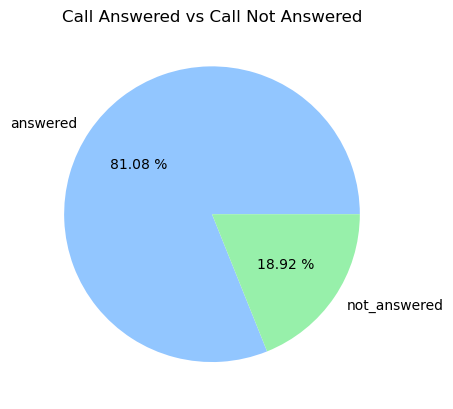

In [23]:
plt.pie([answered, not_answered], labels=['answered', 'not_answered'], autopct='%.2f %%')
plt.title('Call Answered vs Call Not Answered')

plt.show()

In [24]:
answered_resolved = df.groupby(['answered', 'resolved'])['resolved'].count()[2]
answered_not_resolved = df.groupby(['answered', 'resolved'])['resolved'].count()[1]

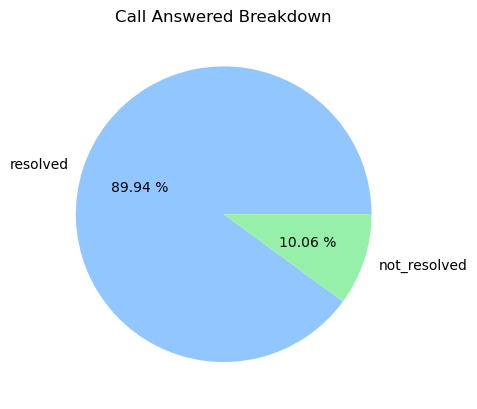

In [25]:
plt.pie([answered_resolved, answered_not_resolved], labels=['resolved', 'not_resolved'], autopct='%.2f %%')
plt.title('Call Answered Breakdown')

plt.show()

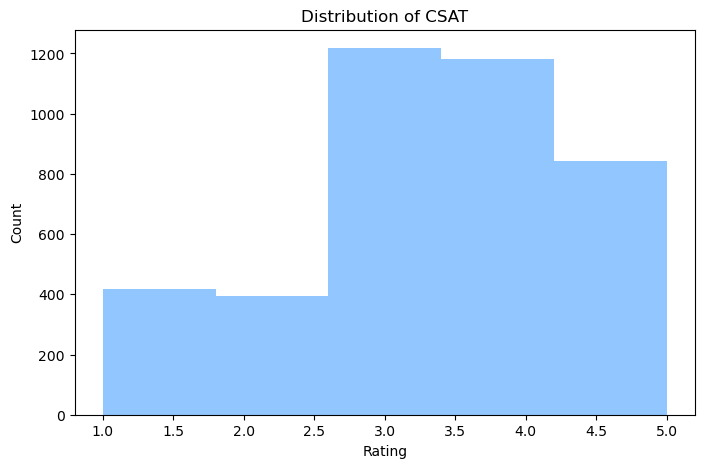

In [26]:
plt.figure(figsize=(8, 5))
plt.hist(df.csat, bins=5)
plt.title('Distribution of CSAT')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

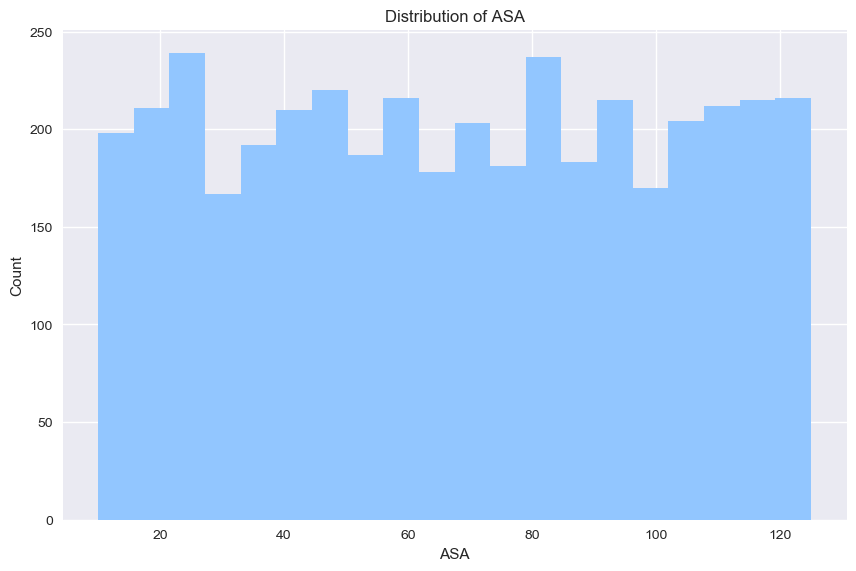

In [27]:
plt.figure(figsize=(8, 5))
plt.hist(df.speed_answer, bins=20)
plt.title('Distribution of Speed of Answer Time')
plt.xlabel('Speed of Answer')
plt.ylabel('Count')

plt.show()

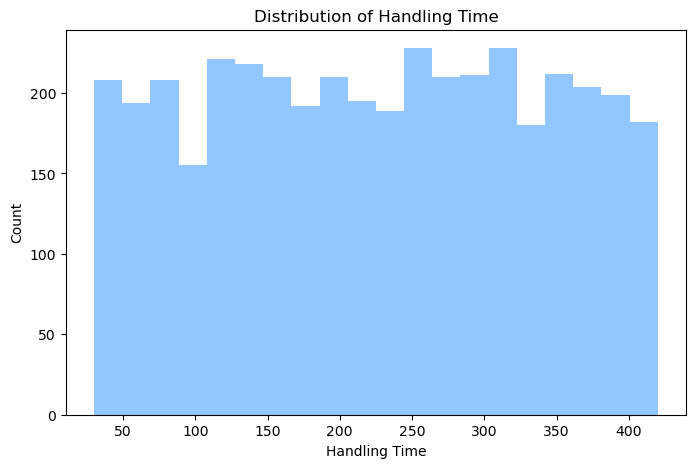

In [28]:
plt.figure(figsize=(8, 5))
plt.hist(df.handling_time, bins=20)
plt.title('Distribution of Handling Time')
plt.xlabel('Handling Time')
plt.ylabel('Count')

plt.show()

In [29]:
avgcsat = df.groupby('date')['csat'].mean().reset_index()
surveycount = df[df['csat']>0].groupby('date')['csat'].count().reset_index()

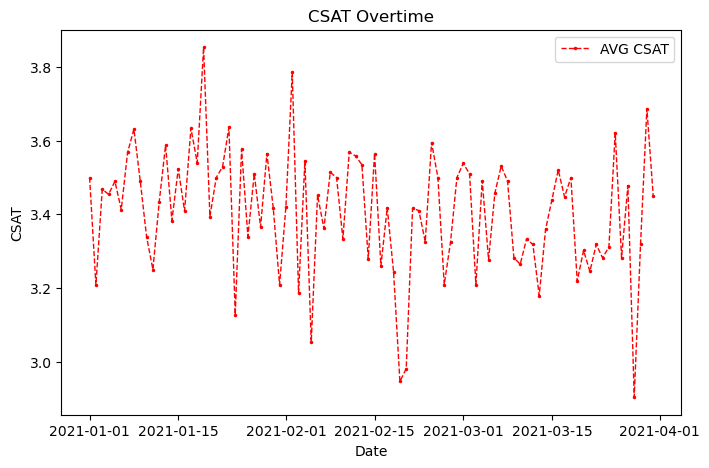

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(avgcsat.date, avgcsat.csat,
         label='AVG CSAT', 
         color='red', 
         linewidth = 1,
         linestyle = '--',
         marker='.',
         markersize = 3
        )
plt.legend()
plt.title('CSAT Overtime')
plt.xlabel('Date')
plt.ylabel('CSAT')

# how to set y-axis and x-axis data range
# plt.xticks([])
# plt.yticks([])

plt.show()

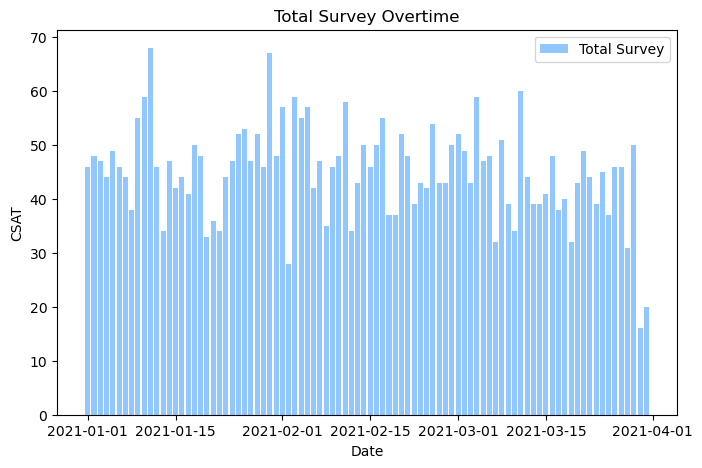

In [31]:
plt.figure(figsize=(8, 5))
plt.bar(surveycount.date, surveycount.csat,
         label='Total Survey')
plt.legend()
plt.title('Total Survey Overtime')
plt.xlabel('Date')
plt.ylabel('CSAT')

# how to set y-axis and x-axis data range
# plt.xticks([])
# plt.yticks([])

plt.show()

In [32]:
dfanswered = df[df['answered']== 'Y']
dfanswered

,datetime,date,month_num,month,day,call_id,agent,topic,answered,resolved,speed_answer,handling_time,csat
0,2021-01-01 09:12:58,2021-01-01,1,January,Friday,ID0001,Diane,Contract related,Y,Y,109.0,143.0,3.0
1,2021-01-01 09:12:58,2021-01-01,1,January,Friday,ID0002,Becky,Technical Support,Y,N,70.0,242.0,3.0
2,2021-01-01 09:47:31,2021-01-01,1,January,Friday,ID0003,Stewart,Contract related,Y,Y,10.0,131.0,3.0
3,2021-01-01 09:47:31,2021-01-01,1,January,Friday,ID0004,Greg,Contract related,Y,Y,53.0,37.0,2.0
4,2021-01-01 10:00:29,2021-01-01,1,January,Friday,ID0005,Becky,Payment related,Y,Y,95.0,60.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,2021-03-31 13:46:34,2021-03-31,3,March,Wednesday,ID4991,Stewart,Streaming,Y,Y,73.0,386.0,1.0
4995,2021-03-31 16:37:55,2021-03-31,3,March,Wednesday,ID4996,Jim,Payment related,Y,Y,22.0,340.0,1.0
4996,2021-03-31 16:45:07,2021-03-31,3,March,Wednesday,ID4997,Diane,Payment related,Y,Y,100.0,196.0,3.0
4997,2021-03-31 16:53:46,2021-03-31,3,March,Wednesday,ID4998,Diane,Payment related,Y,Y,84.0,109.0,4.0


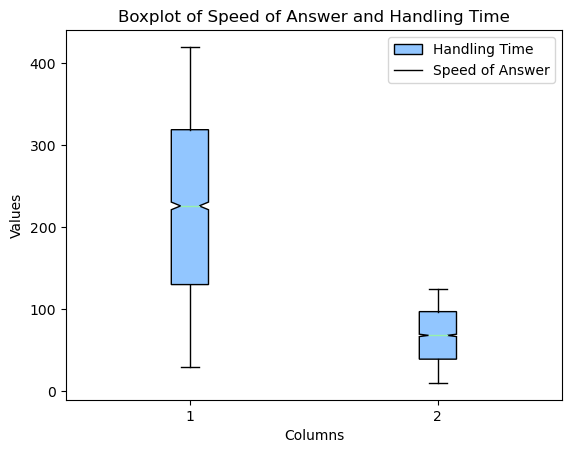

In [33]:
plt.boxplot(dfanswered[['handling_time','speed_answer']], notch=True, vert=True, patch_artist=True)
plt.legend(labels=['Handling Time','Speed of Answer'])
plt.title('Boxplot of Speed of Answer and Handling Time')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [34]:
dfa = df.groupby(['month_num','month'])[['speed_answer','handling_time','csat']].mean().rename(columns={
    'speed_answer': 'asa',
    'handling_time': 'aht',
    'csat': 'avg_csat'}).reset_index()

dfb = df.query('answered =="Y"').groupby(['month_num','month'])['answered'].count().to_frame('total_answered').reset_index()

dfc = df.query('answered =="Y" and resolved == "N"').groupby(['month_num','month'])['answered'].count().to_frame('total_answered_not_resolved').reset_index()

dfd = df.query('answered =="N"').groupby(['month_num','month'])['answered'].count().to_frame('total_abandoned_call').reset_index()

df_monthly_performance = dfa.merge(
    dfb, on=['month_num','month'], how='left').merge(
    dfc, on=['month_num','month'], how='left').merge(
    dfd, on=['month_num','month'], how='left')

df_monthly_performance = df_monthly_performance[['month', 'asa', 'aht', 'avg_csat', 'total_answered',
       'total_answered_not_resolved', 'total_abandoned_call']]
df_monthly_performance

,month,asa,aht,avg_csat,total_answered,total_answered_not_resolved,total_abandoned_call
0,January,67.219931,226.124399,3.454296,1455,144,317
1,February,67.546225,228.235747,3.377504,1298,137,318
2,March,67.831668,220.273636,3.372790,1301,127,311


In [35]:
df1 = df.groupby(['month_num','month','agent'])[['speed_answer','handling_time','csat']].mean().rename(columns={
    'speed_answer': 'asa',
    'handling_time': 'aht',
    'csat': 'avg_csat'}).reset_index()
df2 = df.query('answered =="Y"').groupby(['month_num','month','agent'])['answered'].count().to_frame('total_answered').reset_index()
df3 = df.query('answered =="Y" and resolved == "N"').groupby(['month_num','month','agent'])['answered'].count().to_frame('total_answered_not_resolved').reset_index()
df4 = df.query('answered =="N"').groupby(['month_num','month','agent'])['answered'].count().to_frame('total_abandoned_call').reset_index()
df_agent_performance = df1.merge(
    df2, on=['month_num','month','agent'], how='left').merge(
    df3, on=['month_num','month','agent'], how='left').merge(
    df4, on=['month_num','month','agent'], how='left')
df_agent_performance = df_agent_performance[['month', 'agent', 'asa', 'aht', 'avg_csat',
       'total_answered', 'total_answered_not_resolved',
       'total_abandoned_call']]
df_agent_performance

,month,agent,asa,aht,avg_csat,total_answered,total_answered_not_resolved,total_abandoned_call
0,January,Becky,64.350282,220.333333,3.384181,177,23,39
1,January,Dan,66.952632,237.405263,3.489474,190,13,37
2,January,Diane,63.935135,220.891892,3.427027,185,17,37
3,January,Greg,67.196532,228.144509,3.526012,173,18,35
4,January,Jim,66.663102,231.272727,3.433155,187,14,41
5,January,Joe,71.155914,226.059140,3.354839,186,17,35
6,January,Martha,71.456140,225.818713,3.543860,171,19,49
7,January,Stewart,66.241935,218.607527,3.483871,186,23,44
8,February,Becky,67.688235,237.294118,3.305882,170,17,42
9,February,Dan,66.035294,227.582353,3.523529,170,16,40
